In [162]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import Wrangler as Wr

def makeConfidenceInt(period):
    upper = period + 'Up'
    lower = period + 'Lo'
    anomaly= period + 'Anomaly'
    uncertainty = period + 'Unc'
    tempdata[upper] = tempdata[anomaly] + tempdata[uncertainty]
    tempdata[lower] = tempdata[anomaly] - tempdata[uncertainty]
    

filePath = Wr.makeDirFile('Temperature')
tempdata = pd.read_csv(filePath)
tempdata['Date_in'] = tempdata['Date']
tempdata = tempdata.set_index('Date_in')

In [9]:
# tempdata.info()

In [21]:
# tempdata.describe()

In [22]:
# tempdata.isnull().sum()

In [ ]:
# tempdata[tempdata.duplicated()]

In [176]:
makeConfidenceInt('Monthly')
makeConfidenceInt('Annual')
makeConfidenceInt('TenYear')

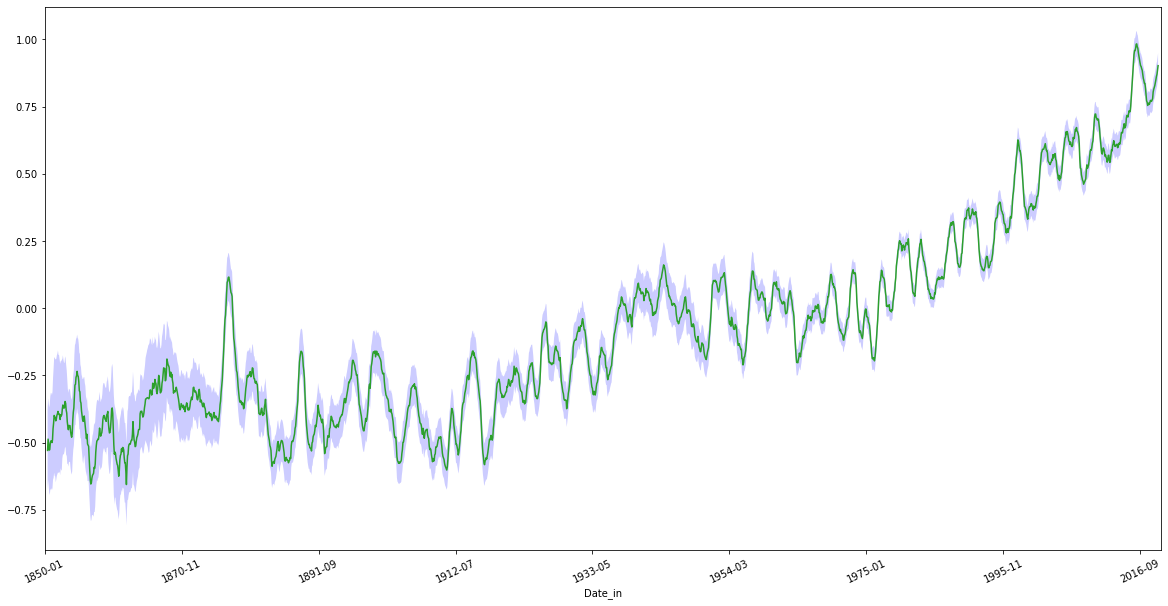

In [179]:
fig, ax = plt.subplots(figsize=(20, 10))
tempdata.AnnualUp.plot(kind='line',alpha=0)
tempdata.AnnualLo.plot(kind='line',alpha=0)
tempdata.AnnualAnomaly.plot(kind='line')
d = tempdata.Date.values
plt.fill_between(d, tempdata.AnnualUp, 
                 tempdata.AnnualLo, 
                 where = tempdata.AnnualUp>=tempdata.AnnualLo,
                 facecolor = 'blue', 
                 alpha=0.2)
plt.xticks(rotation=25)
plt.show()

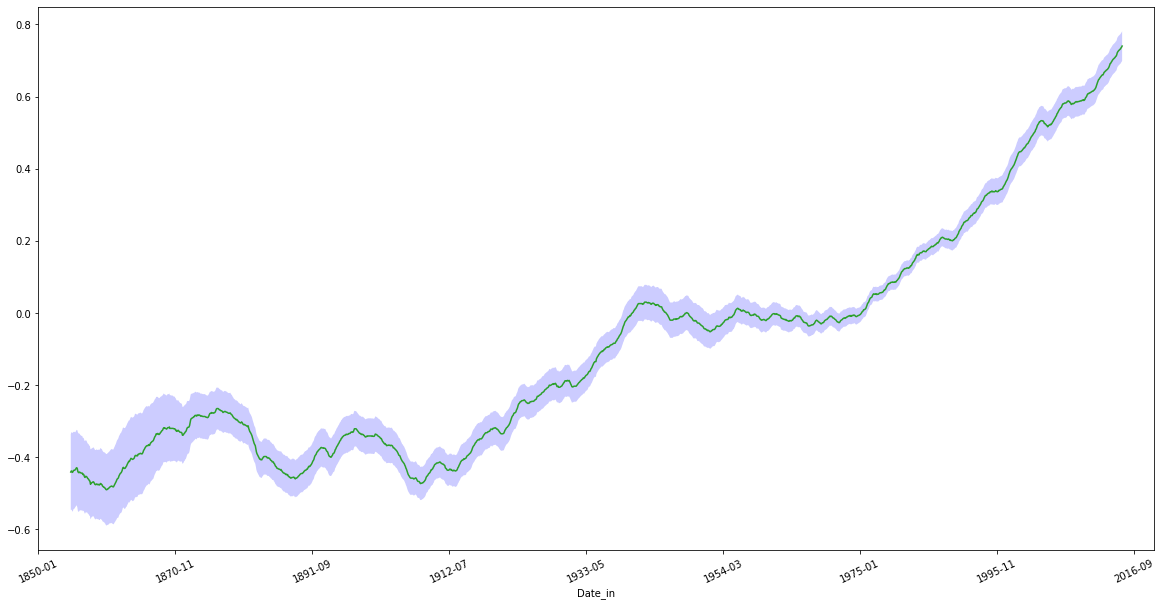

In [177]:
fig, ax = plt.subplots(figsize=(20, 10))
tempdata.TenYearUp.plot(kind='line',alpha=0)
tempdata.TenYearLo.plot(kind='line',alpha=0)
tempdata.TenYearAnomaly.plot(kind='line')
d = tempdata.Date.values
plt.fill_between(d, tempdata.TenYearUp, 
                 tempdata.TenYearLo, 
                 where = tempdata.TenYearUp>=tempdata.TenYearLo,
                 facecolor = 'blue', 
                 alpha=0.2)
plt.xticks(rotation=25)
plt.show()

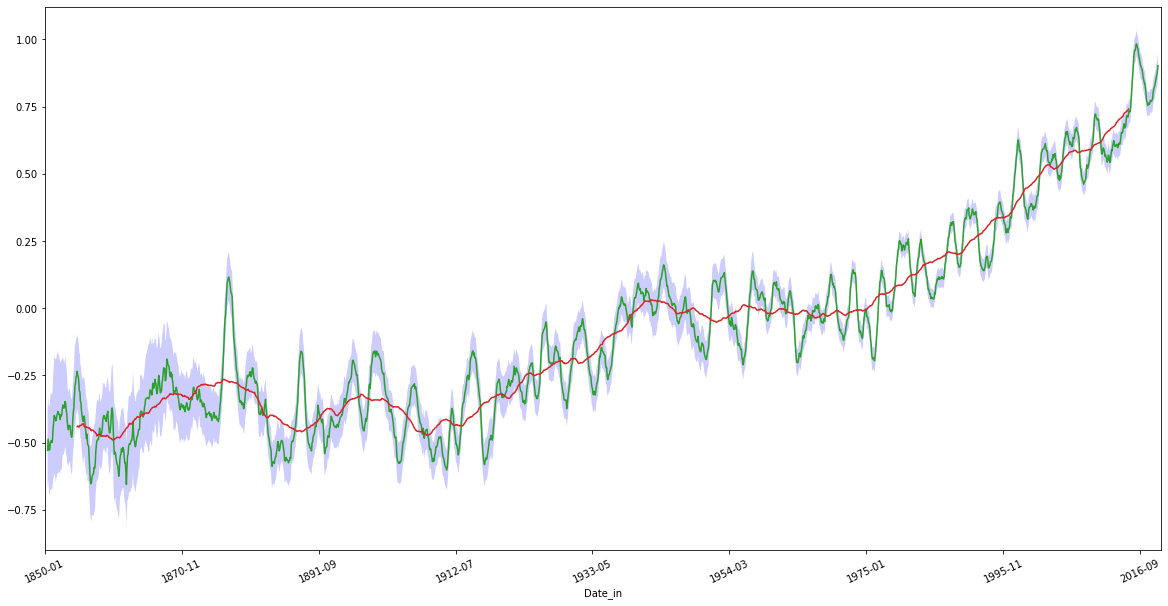

In [178]:
fig, ax = plt.subplots(figsize=(20, 10))
tempdata.AnnualUp.plot(kind='line',alpha=0)
tempdata.AnnualLo.plot(kind='line',alpha=0)
tempdata.AnnualAnomaly.plot(kind='line')
tempdata.TenYearAnomaly.plot(kind='line')
d = tempdata.Date.values
plt.fill_between(d, tempdata.AnnualUp, 
                 tempdata.AnnualLo, 
                 where = tempdata.AnnualUp>=tempdata.AnnualLo,
                 facecolor = 'blue', 
                 alpha=0.2)
plt.xticks(rotation=25)
plt.show()

In [166]:
tempdata.loc[tempdata.Year.isin([1950])]

,Date,Year,Month,MonthlyAnomaly,MonthlyUnc,AnnualAnomaly,AnnualUnc,FiveYearAnomaly,FiveYearUnc,TenYearAnomaly,TenYearUnc,TwentyYearAnomaly,TwentyYearUnc,MonthlyUp,MonthlyLo,AnnualUp,AnnualLo,FiveYearUp,FiveYearLo
Date_in,,,,,,,,,,,,,,,,,,,
1950-01,1950-01,1950,1,-0.228,0.099,-0.129,0.069,-0.059,0.056,-0.021,0.049,-0.003,0.041,-0.129,-0.327,-0.060,-0.198,-0.003,-0.115
1950-02,1950-02,1950,2,-0.314,0.097,-0.133,0.069,-0.056,0.056,-0.022,0.049,-0.002,0.041,-0.217,-0.411,-0.064,-0.202,0.000,-0.112
1950-03,1950-03,1950,3,-0.104,0.096,-0.134,0.068,-0.053,0.055,-0.024,0.049,-0.004,0.041,-0.008,-0.200,-0.066,-0.202,0.002,-0.108
1950-04,1950-04,1950,4,-0.192,0.109,-0.146,0.068,-0.055,0.055,-0.027,0.050,-0.005,0.041,-0.083,-0.301,-0.078,-0.214,0.000,-0.110
1950-05,1950-05,1950,5,-0.052,0.122,-0.165,0.068,-0.059,0.055,-0.028,0.050,-0.005,0.041,0.070,-0.174,-0.097,-0.233,-0.004,-0.114
1950-06,1950-06,1950,6,-0.019,0.112,-0.176,0.068,-0.057,0.054,-0.028,0.050,-0.005,0.041,0.093,-0.131,-0.108,-0.244,-0.003,-0.111
1950-07,1950-07,1950,7,-0.023,0.138,-0.183,0.067,-0.057,0.054,-0.028,0.050,-0.006,0.041,0.115,-0.161,-0.116,-0.250,-0.003,-0.111
1950-08,1950-08,1950,8,-0.155,0.124,-0.189,0.067,-0.051,0.054,-0.029,0.050,-0.006,0.041,-0.031,-0.279,-0.122,-0.256,0.003,-0.105
1950-09,1950-09,1950,9,-0.162,0.115,-0.191,0.067,-0.047,0.053,-0.031,0.050,-0.006,0.041,-0.047,-0.277,-0.124,-0.258,0.006,-0.100
